In [18]:
%autosave 5

Autosaving every 5 seconds


In [3]:
!pip install xlrd -qq

In [ ]:
import pandas as pd
dfs = pd.read_excel("glc2000/Global_Legend.xls", engine="xlrd")

In [7]:
dfs

,VALUE,CLASSNAMES,Red,Green,Blue
0,1,"Tree Cover, broadleaved, evergreen",0.000000,0.390000,0.000000
1,2,"Tree Cover, broadleaved, deciduous, closed",0.000000,0.584314,0.000000
2,3,"Tree Cover, broadleaved, deciduous, open",0.682353,0.996078,0.384314
3,4,"Tree Cover, needle-leaved, evergreen",0.541176,0.266667,0.070588
4,5,"Tree Cover, needle-leaved, deciduous",0.800000,0.494118,0.372549
5,6,"Tree Cover, mixed leaf type",0.545098,0.741176,0.000000
6,7,"Tree Cover, regularly flooded, fresh water",0.466667,0.584314,0.996078
7,8,"Tree Cover, regularly flooded, saline water",0.000000,0.274510,0.780392
8,9,Mosaic: Tree Cover / Other natural vegetation,0.000000,0.898039,0.000000
9,10,"Tree Cover, burnt",0.000000,0.000000,0.000000


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = xr.open_rasterio('glc2000/glc2000_v1_1.tif', chunks={'band': 1, 'x': 1024, 'y': 1024})

In [8]:
data

,Array,Chunk
Bytes,659.35 MB,1.05 MB
Shape,"(1, 16353, 40320)","(1, 1024, 1024)"
Count,641 Tasks,640 Chunks
Type,uint8,numpy.ndarray


In [9]:
data.values

array([[[20, 20, 20, ..., 20, 20, 20],
        [20, 20, 20, ..., 20, 20, 20],
        [20, 20, 20, ..., 20, 20, 20],
        ...,
        [20, 20, 20, ..., 20, 20, 20],
        [20, 20, 20, ..., 20, 20, 20],
        [20, 20, 20, ..., 20, 20, 20]]], dtype=uint8)

In [10]:
data.values.shape

(1, 16353, 40320)

### Range (long, lat): `-21.75, 72.25` *top-left* to  `45.25, 26.75` *bottom-right*

In [3]:
sub_data = data.sel(band=1, x=slice(-21.75, 45.25), y=slice(72.25, 26.75))

In [4]:
sub_data = sub_data.rename({'y': 'lat', 'x': 'lon'})

In [14]:
sub_data

<xarray.DataArray (lat: 5096, lon: 7504)>
dask.array<getitem, shape=(5096, 7504), dtype=uint8, chunksize=(1024, 1024), chunktype=numpy.ndarray>
Coordinates:
    band     int64 1
  * lat      (lat) float64 72.24 72.23 72.22 72.21 ... 26.78 26.77 26.76 26.75
  * lon      (lon) float64 -21.74 -21.73 -21.72 -21.71 ... 45.23 45.24 45.25
Attributes:
    transform:               (0.0089285714, 0.0, -180.0044642857, 0.0, -0.008...
    crs:                     
    res:                     (0.0089285714, 0.0089285714)
    is_tiled:                0
    nodatavals:              (nan,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Point
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_SOFTWARE:        Arc/Info
    TIFFTAG_XRESOLUTION:     112
    TIFFTAG_YRESOLUTION:     112

In [16]:
sub_data.values

array([[20, 20, 20, ..., 20, 20, 20],
       [20, 20, 20, ..., 20, 20, 20],
       [20, 20, 20, ..., 20, 20, 20],
       ...,
       [20, 20, 20, ..., 19, 19, 19],
       [20, 20, 20, ..., 19, 19, 19],
       [20, 20, 20, ..., 19, 19, 19]], dtype=uint8)

In [15]:
sub_data.values.max()

23

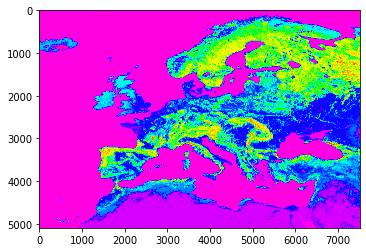

In [17]:
plt.imshow(sub_data.values/19*250, cmap='hsv')

In [5]:
sub_data

<xarray.DataArray (lat: 5096, lon: 7504)>
dask.array<getitem, shape=(5096, 7504), dtype=uint8, chunksize=(1024, 1024), chunktype=numpy.ndarray>
Coordinates:
    band     int64 1
  * lat      (lat) float64 72.24 72.23 72.22 72.21 ... 26.78 26.77 26.76 26.75
  * lon      (lon) float64 -21.74 -21.73 -21.72 -21.71 ... 45.23 45.24 45.25
Attributes:
    transform:               (0.0089285714, 0.0, -180.0044642857, 0.0, -0.008...
    crs:                     
    res:                     (0.0089285714, 0.0089285714)
    is_tiled:                0
    nodatavals:              (nan,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Point
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_SOFTWARE:        Arc/Info
    TIFFTAG_XRESOLUTION:     112
    TIFFTAG_YRESOLUTION:     112

In [6]:
sub_data.to_netcdf(path='/root/fuel.nc4', format='NETCDF4')